data science end of year project part 3 cats vs dogs 9.8.21

In [1]:
#all the imports that i will need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score  
from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In the next 5 cells i will be importing the data from picture form.
<br>When i import the pictures i will be changing the size to 100x100 pixcels and making them gray scale.
<br>Because i dont want this done every time i rerun the notebook the next cells will be text because the code has alteady been run. 

In [2]:
# import os
# import cv2

In [3]:
# train_dir=r'C:\Users\nechd\Desktop\train1'
# image_size=100

In [4]:
#def label_img(img):
#    word_label=img.split('.')[-3]
#    if word_label=='cat':return [0]
#    elif word_label =='dog':return [1]

In [5]:
#def create_train_data():
#    training_data=[]
#    for img in (os.listdir(train_dir)):
#        label=label_img(img)
#        path=os.path.join(train_dir,img)
#        img=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(image_size,image_size))
#        training_data.append([img,label])
#    np.save('train_data.npy',training_data)
#    return training_data

In [6]:
# train_data=create_train_data()

In the next 5 cells i will be taking the data and putting into a dataframe format then save it on the computer and reupload it.
<br> Because i dont want this done every time i rerun the notebook the next cells will be text because the code has already been run. 

In [7]:
# def create_pic_row(y):
#    df3=pd.DataFrame(train_data[y][0][0])
#    for x in range (1,100):
#        df2=pd.DataFrame(train_data[y][0][x])
#        df3= df3.append(df2)
#    df5=pd.DataFrame(train_data[y][1])
#    df3= df3.append(df5)
#    df3=df3.T
#    return df3

In [8]:
#data=create_pic_row(0)
#for y in range(1,24999):
#    count=y
#    data1=create_pic_row(y) 
#    data=data.append(data1) 
#    print(y)
#data      


In [9]:
#columns=np.arange(0,10001)
#rows=np.arange(0,24999)

In [10]:
#data=data.set_axis(columns, axis='columns')
#data=data.set_index(rows)

In [11]:
#data.to_csv('cats_vs_dogs_train.csv')

In [135]:
#importing the train data frame that is saved to my computer

training_set=pd.read_csv(r"C:\Users\nechd\Desktop\cats_vs_dogs_train.csv")

In [136]:
training_set=training_set.drop(['Unnamed: 0'], axis=1)
training_set

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,168,174,177,181,185,188,190,193,196,198,...,3,3,2,2,2,2,2,2,2,0
1,43,44,43,42,52,34,51,40,39,63,...,47,50,49,55,63,64,89,19,36,0
2,39,25,43,49,47,57,58,54,53,59,...,158,150,133,135,145,160,169,171,153,0
3,221,224,222,228,229,224,224,235,229,227,...,212,204,204,203,215,222,217,211,213,0
4,115,119,122,91,83,95,132,131,149,180,...,96,97,94,100,119,95,90,95,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,122,128,124,125,127,129,130,128,125,122,...,49,49,45,32,32,35,26,21,17,1
24995,140,143,142,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
24996,117,78,102,83,101,113,69,85,86,86,...,97,77,100,84,77,85,93,94,74,1
24997,42,35,47,58,65,46,51,57,58,40,...,133,130,125,70,113,182,127,113,167,1


In [137]:
# creating a copy of the data frame with a new name

training_set1=training_set
training_set1

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,168,174,177,181,185,188,190,193,196,198,...,3,3,2,2,2,2,2,2,2,0
1,43,44,43,42,52,34,51,40,39,63,...,47,50,49,55,63,64,89,19,36,0
2,39,25,43,49,47,57,58,54,53,59,...,158,150,133,135,145,160,169,171,153,0
3,221,224,222,228,229,224,224,235,229,227,...,212,204,204,203,215,222,217,211,213,0
4,115,119,122,91,83,95,132,131,149,180,...,96,97,94,100,119,95,90,95,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,122,128,124,125,127,129,130,128,125,122,...,49,49,45,32,32,35,26,21,17,1
24995,140,143,142,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
24996,117,78,102,83,101,113,69,85,86,86,...,97,77,100,84,77,85,93,94,74,1
24997,42,35,47,58,65,46,51,57,58,40,...,133,130,125,70,113,182,127,113,167,1


In [138]:
# creating an empty data frame 
label=pd.DataFrame()
label

""


In [139]:
# putting data into the empty data frame

label=training_set1['10000']
label

0        0
1        0
2        0
3        0
4        0
        ..
24994    1
24995    1
24996    1
24997    1
24998    1
Name: 10000, Length: 24999, dtype: int64

Even though the data is normalized - it represents pixels in a grey scale, my results were not great, so i decided to divide all the features by 255, except the last feature which is the label. 

In [140]:
# even though the data is normalized becayse it represents pixels in grey scale, my results were not great, so i decided to divide all the features by 255, except the last feature which is the label. 

training_set1=training_set1.div(255)
training_set1

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0.658824,0.682353,0.694118,0.709804,0.725490,0.737255,0.745098,0.756863,0.768627,0.776471,...,0.011765,0.011765,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.000000
1,0.168627,0.172549,0.168627,0.164706,0.203922,0.133333,0.200000,0.156863,0.152941,0.247059,...,0.184314,0.196078,0.192157,0.215686,0.247059,0.250980,0.349020,0.074510,0.141176,0.000000
2,0.152941,0.098039,0.168627,0.192157,0.184314,0.223529,0.227451,0.211765,0.207843,0.231373,...,0.619608,0.588235,0.521569,0.529412,0.568627,0.627451,0.662745,0.670588,0.600000,0.000000
3,0.866667,0.878431,0.870588,0.894118,0.898039,0.878431,0.878431,0.921569,0.898039,0.890196,...,0.831373,0.800000,0.800000,0.796078,0.843137,0.870588,0.850980,0.827451,0.835294,0.000000
4,0.450980,0.466667,0.478431,0.356863,0.325490,0.372549,0.517647,0.513725,0.584314,0.705882,...,0.376471,0.380392,0.368627,0.392157,0.466667,0.372549,0.352941,0.372549,0.321569,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,0.478431,0.501961,0.486275,0.490196,0.498039,0.505882,0.509804,0.501961,0.490196,0.478431,...,0.192157,0.192157,0.176471,0.125490,0.125490,0.137255,0.101961,0.082353,0.066667,0.003922
24995,0.549020,0.560784,0.556863,0.568627,0.572549,0.576471,0.580392,0.584314,0.580392,0.584314,...,0.647059,0.650980,0.650980,0.654902,0.658824,0.658824,0.658824,0.658824,0.662745,0.003922
24996,0.458824,0.305882,0.400000,0.325490,0.396078,0.443137,0.270588,0.333333,0.337255,0.337255,...,0.380392,0.301961,0.392157,0.329412,0.301961,0.333333,0.364706,0.368627,0.290196,0.003922
24997,0.164706,0.137255,0.184314,0.227451,0.254902,0.180392,0.200000,0.223529,0.227451,0.156863,...,0.521569,0.509804,0.490196,0.274510,0.443137,0.713725,0.498039,0.443137,0.654902,0.003922


In [141]:
# getting rid of the last column - the label, because it is no longer zeros and ones.

training_set1=training_set1.drop(['10000'], axis=1)
training_set1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.658824,0.682353,0.694118,0.709804,0.725490,0.737255,0.745098,0.756863,0.768627,0.776471,...,0.011765,0.011765,0.011765,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843
1,0.168627,0.172549,0.168627,0.164706,0.203922,0.133333,0.200000,0.156863,0.152941,0.247059,...,0.172549,0.184314,0.196078,0.192157,0.215686,0.247059,0.250980,0.349020,0.074510,0.141176
2,0.152941,0.098039,0.168627,0.192157,0.184314,0.223529,0.227451,0.211765,0.207843,0.231373,...,0.600000,0.619608,0.588235,0.521569,0.529412,0.568627,0.627451,0.662745,0.670588,0.600000
3,0.866667,0.878431,0.870588,0.894118,0.898039,0.878431,0.878431,0.921569,0.898039,0.890196,...,0.905882,0.831373,0.800000,0.800000,0.796078,0.843137,0.870588,0.850980,0.827451,0.835294
4,0.450980,0.466667,0.478431,0.356863,0.325490,0.372549,0.517647,0.513725,0.584314,0.705882,...,0.364706,0.376471,0.380392,0.368627,0.392157,0.466667,0.372549,0.352941,0.372549,0.321569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,0.478431,0.501961,0.486275,0.490196,0.498039,0.505882,0.509804,0.501961,0.490196,0.478431,...,0.207843,0.192157,0.192157,0.176471,0.125490,0.125490,0.137255,0.101961,0.082353,0.066667
24995,0.549020,0.560784,0.556863,0.568627,0.572549,0.576471,0.580392,0.584314,0.580392,0.584314,...,0.643137,0.647059,0.650980,0.650980,0.654902,0.658824,0.658824,0.658824,0.658824,0.662745
24996,0.458824,0.305882,0.400000,0.325490,0.396078,0.443137,0.270588,0.333333,0.337255,0.337255,...,0.376471,0.380392,0.301961,0.392157,0.329412,0.301961,0.333333,0.364706,0.368627,0.290196
24997,0.164706,0.137255,0.184314,0.227451,0.254902,0.180392,0.200000,0.223529,0.227451,0.156863,...,0.396078,0.521569,0.509804,0.490196,0.274510,0.443137,0.713725,0.498039,0.443137,0.654902


In [142]:
# adding the data frame label ta are main data frame so that we have the labels again.

training_set1['label']=label
training_set1

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,0.658824,0.682353,0.694118,0.709804,0.725490,0.737255,0.745098,0.756863,0.768627,0.776471,...,0.011765,0.011765,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0
1,0.168627,0.172549,0.168627,0.164706,0.203922,0.133333,0.200000,0.156863,0.152941,0.247059,...,0.184314,0.196078,0.192157,0.215686,0.247059,0.250980,0.349020,0.074510,0.141176,0
2,0.152941,0.098039,0.168627,0.192157,0.184314,0.223529,0.227451,0.211765,0.207843,0.231373,...,0.619608,0.588235,0.521569,0.529412,0.568627,0.627451,0.662745,0.670588,0.600000,0
3,0.866667,0.878431,0.870588,0.894118,0.898039,0.878431,0.878431,0.921569,0.898039,0.890196,...,0.831373,0.800000,0.800000,0.796078,0.843137,0.870588,0.850980,0.827451,0.835294,0
4,0.450980,0.466667,0.478431,0.356863,0.325490,0.372549,0.517647,0.513725,0.584314,0.705882,...,0.376471,0.380392,0.368627,0.392157,0.466667,0.372549,0.352941,0.372549,0.321569,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,0.478431,0.501961,0.486275,0.490196,0.498039,0.505882,0.509804,0.501961,0.490196,0.478431,...,0.192157,0.192157,0.176471,0.125490,0.125490,0.137255,0.101961,0.082353,0.066667,1
24995,0.549020,0.560784,0.556863,0.568627,0.572549,0.576471,0.580392,0.584314,0.580392,0.584314,...,0.647059,0.650980,0.650980,0.654902,0.658824,0.658824,0.658824,0.658824,0.662745,1
24996,0.458824,0.305882,0.400000,0.325490,0.396078,0.443137,0.270588,0.333333,0.337255,0.337255,...,0.380392,0.301961,0.392157,0.329412,0.301961,0.333333,0.364706,0.368627,0.290196,1
24997,0.164706,0.137255,0.184314,0.227451,0.254902,0.180392,0.200000,0.223529,0.227451,0.156863,...,0.521569,0.509804,0.490196,0.274510,0.443137,0.713725,0.498039,0.443137,0.654902,1


In [20]:
#splitting the data
# I need to split it into 3 parts, so that we have a train and test for the training ang a test for the final test.

train_set, test_set1 = train_test_split(training_set1, test_size=0.3, random_state=42)
test_set, test_set_dont_touch=train_test_split(test_set1, test_size=0.5, random_state=42)

In [21]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17499 entries, 4913 to 23654
Columns: 10001 entries, 0 to label
dtypes: float64(10000), int64(1)
memory usage: 1.3 GB


In [22]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 23922 to 24214
Columns: 10001 entries, 0 to label
dtypes: float64(10000), int64(1)
memory usage: 286.2 MB


In [23]:
test_set_dont_touch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 17149 to 8198
Columns: 10001 entries, 0 to label
dtypes: float64(10000), int64(1)
memory usage: 286.2 MB


In [24]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
4913,0.109804,0.152941,0.215686,0.290196,0.101961,0.058824,0.082353,0.074510,0.035294,0.070588,...,0.796078,0.811765,0.807843,0.803922,0.803922,0.807843,0.780392,0.760784,0.752941,0
9338,0.929412,0.945098,0.937255,0.941176,0.949020,0.933333,0.929412,0.925490,0.913725,0.929412,...,0.658824,0.619608,0.623529,0.462745,0.498039,0.576471,0.552941,0.568627,0.686275,0
24210,0.803922,0.737255,0.639216,0.529412,0.482353,0.549020,0.537255,0.486275,0.435294,0.392157,...,0.670588,0.658824,0.662745,0.650980,0.611765,0.541176,0.450980,0.392157,0.352941,1
18790,0.333333,0.341176,0.329412,0.317647,0.325490,0.329412,0.341176,0.349020,0.356863,0.360784,...,0.274510,0.168627,0.109804,0.321569,0.156863,0.133333,0.294118,0.341176,0.203922,1
16066,0.525490,0.513725,0.517647,0.521569,0.501961,0.478431,0.482353,0.458824,0.427451,0.439216,...,0.305882,0.447059,0.400000,0.333333,0.549020,0.482353,0.478431,0.423529,0.419608,1


In [25]:
test_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
23922,0.556863,0.627451,0.552941,0.572549,0.635294,0.623529,0.654902,0.658824,0.662745,0.658824,...,0.082353,0.082353,0.078431,0.070588,0.078431,0.074510,0.082353,0.090196,0.090196,1
3852,0.109804,0.094118,0.113725,0.098039,0.105882,0.113725,0.113725,0.094118,0.105882,0.094118,...,0.113725,0.109804,0.105882,0.105882,0.121569,0.113725,0.125490,0.101961,0.113725,0
16283,0.835294,0.882353,0.874510,0.862745,0.921569,0.901961,0.952941,0.819608,0.945098,0.898039,...,1.000000,0.972549,0.945098,0.776471,0.941176,0.905882,0.878431,0.882353,0.866667,1
4271,0.431373,0.384314,0.494118,0.505882,0.498039,0.513725,0.486275,0.517647,0.650980,0.619608,...,0.890196,0.843137,0.905882,0.862745,0.866667,0.862745,0.843137,0.882353,0.882353,0
11337,0.847059,0.819608,0.776471,0.843137,0.800000,0.686275,0.839216,0.866667,0.847059,0.792157,...,0.588235,0.435294,0.439216,0.482353,0.490196,0.552941,0.588235,0.576471,0.815686,0


In [26]:
test_set_dont_touch.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
17149,0.607843,0.647059,0.580392,0.537255,0.517647,0.592157,0.549020,0.580392,0.545098,0.568627,...,0.321569,0.258824,0.372549,0.470588,0.407843,0.392157,0.321569,0.400000,0.200000,1
11072,0.211765,0.211765,0.211765,0.219608,0.219608,0.223529,0.227451,0.227451,0.235294,0.239216,...,0.847059,0.854902,0.843137,0.870588,0.733333,0.725490,0.733333,0.639216,0.800000,0
11766,0.333333,0.360784,0.337255,0.337255,0.317647,0.325490,0.329412,0.321569,0.294118,0.313725,...,0.643137,0.615686,0.615686,0.611765,0.615686,0.611765,0.611765,0.619608,0.615686,0
1794,0.050980,0.031373,0.047059,0.023529,0.027451,0.066667,0.023529,0.039216,0.066667,0.066667,...,0.023529,0.023529,0.019608,0.015686,0.019608,0.015686,0.007843,0.007843,0.007843,0
1086,0.133333,0.054902,0.039216,0.168627,0.117647,0.058824,0.082353,0.050980,0.227451,0.176471,...,0.262745,0.215686,0.188235,0.207843,0.129412,0.278431,0.282353,0.152941,0.149020,0


In [27]:
# changing the data type and spliiting into x,y
train_set=np.array(train_set,dtype='float32')
test_set=np.array(test_set,dtype='float32')
test_set_dont_touch=np.array(test_set,dtype='float32')

x_train_set=train_set[ : , 0:10000]
y_train_set=train_set[ : , 10000]
x_test_set=test_set[ : , 0:10000]
y_test_set=test_set[ : , 10000]
x_test_set_dont_touch=test_set_dont_touch[ : , 0:10000]
y_test_set_dont_touch=test_set_dont_touch[ : , 10000]

In [28]:
x_train_set

array([[0.10980392, 0.15294118, 0.21568628, ..., 0.78039217, 0.7607843 ,
        0.7529412 ],
       [0.92941177, 0.94509804, 0.9372549 , ..., 0.5529412 , 0.5686275 ,
        0.6862745 ],
       [0.8039216 , 0.7372549 , 0.6392157 , ..., 0.4509804 , 0.39215687,
        0.3529412 ],
       ...,
       [0.25490198, 0.2784314 , 0.2627451 , ..., 0.15686275, 0.16078432,
        0.12156863],
       [0.5568628 , 0.6431373 , 0.5019608 , ..., 0.44705883, 0.46666667,
        0.6156863 ],
       [0.43529412, 0.28627452, 0.23529412, ..., 0.07058824, 0.08627451,
        0.07450981]], dtype=float32)

In [29]:
y_train_set

array([0., 0., 1., ..., 0., 1., 1.], dtype=float32)

In [30]:
x_test_set

array([[0.5568628 , 0.627451  , 0.5529412 , ..., 0.08235294, 0.09019608,
        0.09019608],
       [0.10980392, 0.09411765, 0.11372549, ..., 0.1254902 , 0.10196079,
        0.11372549],
       [0.8352941 , 0.88235295, 0.8745098 , ..., 0.8784314 , 0.88235295,
        0.8666667 ],
       ...,
       [0.5058824 , 0.53333336, 0.3647059 , ..., 0.54509807, 0.6       ,
        0.5254902 ],
       [0.26666668, 0.2627451 , 0.31764707, ..., 0.14509805, 0.13725491,
        0.14509805],
       [0.3137255 , 0.33333334, 0.35686275, ..., 0.25490198, 0.25882354,
        0.27058825]], dtype=float32)

In [31]:
y_test_set

array([1., 0., 1., ..., 1., 0., 1.], dtype=float32)

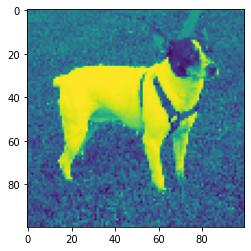

In [32]:
image1=x_train_set[7, :].reshape((100,100))
plt.imshow(image1)

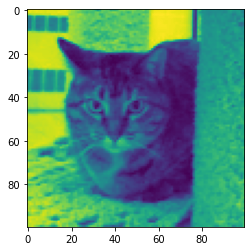

In [33]:
image1=x_train_set[1, :].reshape((100,100))
plt.imshow(image1)

# Training the models

Because this data set has 10000 features I will start running the models after I have lowered the amount of features by using PCA.

In [34]:
# function to represent the confusion matrix nicely

def confussion_matrix (cf_matrix):
    group_names = ['true pos', 'false pos', 'false neg', 'true neg']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Oranges')  

## PCA 0.9

In [35]:
pca1=PCA(n_components=0.9)
x_train_reduced1=pca1.fit_transform(x_train_set)
x_test_reduced1=pca1.transform(x_test_set)

In [36]:
pca1.n_components_

331

## KNN1

In [37]:
arr=np.arange(5,80,5)
arr

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

In [38]:
for x in arr:
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced1, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced1)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    print (x,accuracy_knn_x )

5 0.5984
10 0.6146666666666667
15 0.6221333333333333
20 0.6210666666666667
25 0.6253333333333333
30 0.6253333333333333
35 0.6264
40 0.6349333333333333
45 0.6306666666666667
50 0.6368
55 0.6362666666666666
60 0.6336
65 0.6362666666666666
70 0.6328
75 0.6322666666666666


In [39]:
arr1=np.arange(40,56,1)
arr1

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])

In [40]:
for x in arr1:
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced1, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced1)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    if (accuracy_knn_x>0.635):
        print (x,accuracy_knn_x )
    else:
        print(x)

40
41
42 0.6352
43
44
45
46
47
48 0.6378666666666667
49
50 0.6368
51
52 0.6392
53 0.6352
54 0.64
55 0.6362666666666666


In [41]:
knn1 = KNeighborsClassifier(n_neighbors=52)
knn1.fit(x_train_reduced1, y_train_set)
y_pred_knn1=knn1.predict(x_test_reduced1)
accuracy_knn1=metrics.accuracy_score(y_test_set, y_pred_knn1)
accuracy_knn1

0.6392

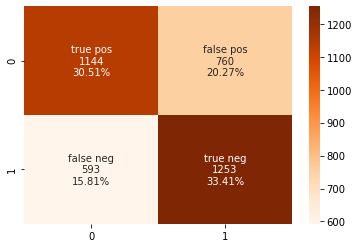

In [42]:
# confusion matrix
mat_knn1=confusion_matrix(y_test_set, y_pred_knn1)
confussion_matrix(mat_knn1)

In [43]:
# precision score, recall score, f1 score
print("precision_score_knn:",precision_score(y_test_set, y_pred_knn1)) 
print("recall_score_knn:",recall_score(y_test_set, y_pred_knn1))
print("f1_score_knn:",f1_score(y_test_set, y_pred_knn1))

precision_score_knn: 0.6224540486835569
recall_score_knn: 0.6787648970747562
f1_score_knn: 0.6493910339466183


In [44]:
#cross validation
cv_scores_knn1=cross_val_score(knn1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn1, "mean:", np.mean(cv_scores_knn1))

[0.60657143 0.592      0.61685714 0.62       0.60245785] mean: 0.6075772833054343


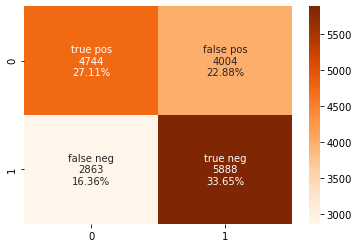

In [45]:
# confusion matrix
y_pred_knn1_c = cross_val_predict(knn1,  x_train_reduced1, y_train_set, cv=5)
cofussion_knn1=confusion_matrix(y_train_set, y_pred_knn1_c)
confussion_matrix(cofussion_knn1)

In [46]:
print("precision_score:",precision_score(y_train_set, y_pred_knn1_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_knn1_c))
print("f1_score:",f1_score(y_train_set, y_pred_knn1_c))

precision_score: 0.5952284674484432
recall_score: 0.67283739001257
f1_score: 0.631657994957893


## XG1

In [47]:
arr2=np.arange(25,525,25)
arr2

array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325,
       350, 375, 400, 425, 450, 475, 500])

In [48]:
for x in arr2:
    XG1=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG1.fit(x_train_reduced1, y_train_set)
    y_pred_XG1=XG1.predict(x_test_reduced1)
    accuracy_XG1=metrics.accuracy_score(y_test_set, y_pred_XG1)
    if (accuracy_XG1>0.635):
        print (x,accuracy_XG1 )
    else:
        print(x)

25
50
75
100 0.636
125 0.6368
150 0.6418666666666667
175 0.6381333333333333
200 0.6368
225 0.6397333333333334
250 0.6429333333333334
275 0.6426666666666667
300 0.6394666666666666
325 0.6448
350 0.6474666666666666
375 0.6509333333333334
400 0.6506666666666666
425 0.6536
450 0.6525333333333333
475 0.652
500 0.6517333333333334


In [49]:
XG1=XGBClassifier(n_estimators=425, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG1.fit(x_train_reduced1, y_train_set)
y_pred_XG1=XG1.predict(x_test_reduced1)
accuracy_XG1=metrics.accuracy_score(y_test_set, y_pred_XG1)
accuracy_XG1

0.6536

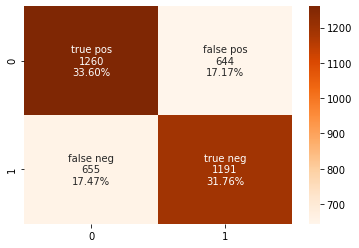

In [50]:
# confusion matrix
mat_XG1=confusion_matrix(y_test_set, y_pred_XG1)
confussion_matrix(mat_XG1)

In [51]:
# precision score, recall score, f1 score
print("precision_score_XG1:",precision_score(y_test_set, y_pred_XG1)) 
print("recall_score_XG1:",recall_score(y_test_set, y_pred_XG1))
print("f1_score_XG1:",f1_score(y_test_set, y_pred_XG1))

precision_score_XG1: 0.6490463215258856
recall_score_XG1: 0.6451787648970747
f1_score_XG1: 0.6471067644661777


In [52]:
#cross validation
cv_scores_XG1=cross_val_score(XG1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG1, "mean:", np.mean(cv_scores_XG1))

[0.62628571 0.63685714 0.62714286 0.63685714 0.64475564] mean: 0.6343797003225412


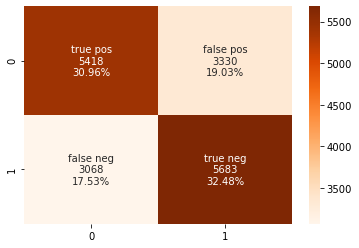

In [53]:
# confusion matrix
y_pred_xg1_c = cross_val_predict(XG1,  x_train_reduced1, y_train_set, cv=5)
cofussion_xg1=confusion_matrix(y_train_set, y_pred_xg1_c)
confussion_matrix(cofussion_xg1)

In [54]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg1_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_xg1_c))
print("f1_score:",f1_score(y_train_set, y_pred_xg1_c))

precision_score: 0.6305336735826029
recall_score: 0.6494114958290481
f1_score: 0.6398333708624183


## Random Forset1

In [55]:
forest1= RandomForestClassifier(random_state=42)
forest1.fit(x_train_reduced1, y_train_set)
y_pred_forest1=forest1.predict(x_test_reduced1)
accuracy_forest1=metrics.accuracy_score(y_test_set, y_pred_forest1)
accuracy_forest1

0.6096

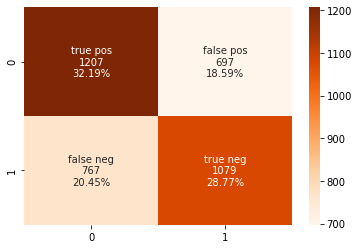

In [56]:
# confusion matrix
mat_forest1=confusion_matrix(y_test_set, y_pred_forest1)
confussion_matrix(mat_forest1)

In [57]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_forest1)) 
print("recall_score:",recall_score(y_test_set, y_pred_forest1))
print("f1_score:",f1_score(y_test_set, y_pred_forest1))

precision_score: 0.607545045045045
recall_score: 0.5845070422535211
f1_score: 0.5958034235229156


In [58]:
#cross validation
cv_scores_forest1=cross_val_score(forest1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_forest1, "mean:", np.mean(cv_scores_forest1))

[0.592      0.58971429 0.59257143 0.59571429 0.59702772] mean: 0.5934055444412689


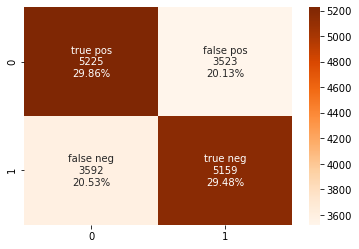

In [59]:
# confusion matrix
y_pred_forest1_c = cross_val_predict(forest1,  x_train_reduced1, y_train_set, cv=5)
cofussion_forest1=confusion_matrix(y_train_set, y_pred_forest1_c)
confussion_matrix(cofussion_forest1)

In [60]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_forest1_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_forest1_c))
print("f1_score:",f1_score(y_train_set, y_pred_forest1_c))

precision_score: 0.5942179221377563
recall_score: 0.589532624842875
f1_score: 0.5918660012619744


## Logistic Regression1

In [61]:
lr1=LogisticRegression(random_state=42)
lr1.fit(x_train_reduced1, y_train_set)
y_pred_lr1=lr1.predict(x_test_reduced1)
accuracy_lr1=metrics.accuracy_score(y_test_set, y_pred_lr1)
accuracy_lr1

0.5661333333333334

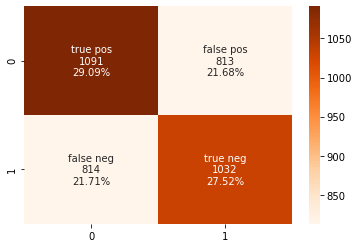

In [62]:
# confusion matrix
mat_lr1=confusion_matrix(y_test_set, y_pred_lr1)
confussion_matrix(mat_lr1)

In [63]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_lr1)) 
print("recall_score:",recall_score(y_test_set, y_pred_lr1))
print("f1_score:",f1_score(y_test_set, y_pred_lr1))

precision_score: 0.5593495934959349
recall_score: 0.5590465872156013
f1_score: 0.5591980493091303


In [64]:
#cross validation
cv_scores_lr1=cross_val_score(lr1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_lr1, "mean:", np.mean(cv_scores_lr1))

[0.52914286 0.54142857 0.54685714 0.55914286 0.549014  ] mean: 0.5451170865145143


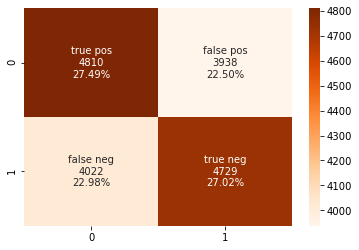

In [65]:
# confusion matrix
y_pred_lr1_c = cross_val_predict(lr1,  x_train_reduced1, y_train_set, cv=5)
cofussion_lr1=confusion_matrix(y_train_set, y_pred_lr1_c)
confussion_matrix(cofussion_lr1)

In [66]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_lr1_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_lr1_c))
print("f1_score:",f1_score(y_train_set, y_pred_lr1_c))

precision_score: 0.5456328602746048
recall_score: 0.540395383384756
f1_score: 0.5430014927086921


## Vote1

In [254]:
vote1=VotingClassifier(estimators=[('knn', knn1),('forest', forest1),('xg',XG1),('lr',lr1)], voting='soft',weights=[0.35,0.2,0.45,0.2])
vote1.fit(x_train_reduced1, y_train_set)
y_pred_vote1=vote1.predict(x_test_reduced1)
accuracy_vote1=metrics.accuracy_score(y_test_set, y_pred_vote1)
accuracy_vote1

0.6594666666666666

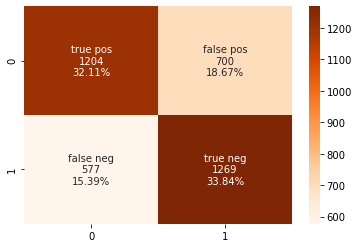

In [256]:
# confusion matrix
mat_vote1=confusion_matrix(y_test_set, y_pred_vote1)
confussion_matrix(mat_vote1)

In [257]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_vote1)) 
print("recall_score:",recall_score(y_test_set, y_pred_vote1))
print("f1_score:",f1_score(y_test_set, y_pred_vote1))

precision_score: 0.6444895886236668
recall_score: 0.6874322860238353
f1_score: 0.6652686762778506


In [258]:
#cross validation
cv_scores_vote1=cross_val_score(vote1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_vote1, "mean:", np.mean(cv_scores_vote1))

[0.62771429 0.63257143 0.638      0.64942857 0.63646756] mean: 0.6368363695749806


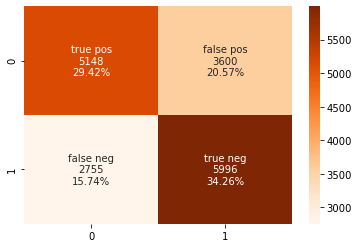

In [259]:
# confusion matrix
y_pred_vote1_c = cross_val_predict(vote1,  x_train_reduced1, y_train_set, cv=5)
cofussion_vote1=confusion_matrix(y_train_set, y_pred_vote1_c)
confussion_matrix(cofussion_vote1)

In [260]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_vote1_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_vote1_c))
print("f1_score:",f1_score(y_train_set, y_pred_vote1_c))

precision_score: 0.6248436848686952
recall_score: 0.6851788367043766
f1_score: 0.6536218455333297


In [262]:
### The best model with PCA 0.9 when checking with cross validation is the Voting Classifier with 63.68% success.

## PCA 0.8

In [73]:
pca2=PCA(n_components=0.8)
x_train_reduced2=pca2.fit_transform(x_train_set)
x_test_reduced2=pca2.transform(x_test_set)

In [74]:
pca2.n_components_

72

## KNN2

In [75]:
for x in arr:
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced2, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced2)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    print (x,accuracy_knn_x )

5 0.6024
10 0.6128
15 0.6149333333333333
20 0.6330666666666667
25 0.6293333333333333
30 0.6336
35 0.6298666666666667
40 0.6328
45 0.6290666666666667
50 0.6314666666666666
55 0.628
60 0.6346666666666667
65 0.6282666666666666
70 0.6237333333333334
75 0.6157333333333334


In [191]:
knn2 = KNeighborsClassifier(n_neighbors=30)
knn2.fit(x_train_reduced2, y_train_set)
y_pred_knn2=knn2.predict(x_test_reduced2)
accuracy_knn2=metrics.accuracy_score(y_test_set, y_pred_knn2)
accuracy_knn2

0.6336

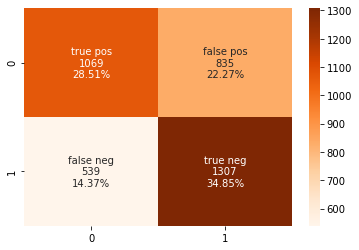

In [192]:
# confusion matrix
mat_knn2=confusion_matrix(y_test_set, y_pred_knn2)
confussion_matrix(mat_knn2)

In [193]:
# precision score, recall score, f1 score
print("precision_score_knn2:",precision_score(y_test_set, y_pred_knn2)) 
print("recall_score_knn2:",recall_score(y_test_set, y_pred_knn2))
print("f1_score_knn2:",f1_score(y_test_set, y_pred_knn2))

precision_score_knn2: 0.6101774042950514
recall_score_knn2: 0.7080173347778982
f1_score_knn2: 0.6554663991975928


In [194]:
#cross validation
cv_scores_knn2=cross_val_score(knn2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn2, "mean:", np.mean(cv_scores_knn2))

[0.60914286 0.60428571 0.60971429 0.61542857 0.60417262] mean: 0.6085488098640428


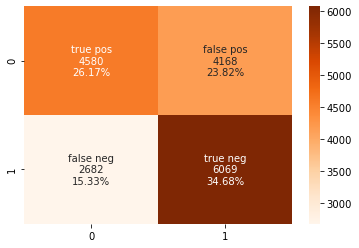

In [195]:
# confusion matrix
y_pred_knn2_c = cross_val_predict(knn2,  x_train_reduced2, y_train_set, cv=5)
cofussion_knn2=confusion_matrix(y_train_set, y_pred_knn2_c)
confussion_matrix(cofussion_knn2)

In [196]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn2_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_knn2_c))
print("f1_score:",f1_score(y_train_set, y_pred_knn2_c))

precision_score: 0.592849467617466
recall_score: 0.6935207404868015
f1_score: 0.6392458394775647


## XG2

In [82]:
for x in arr2:
    XG2=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG2.fit(x_train_reduced2, y_train_set)
    y_pred_XG2=XG2.predict(x_test_reduced2)
    accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
    if (accuracy_XG2>0.625):
        print (x,accuracy_XG2 )
    else:
        print(x)

25
50 0.6309333333333333
75 0.6296
100 0.6336
125 0.6325333333333333
150 0.6333333333333333
175 0.6304
200 0.6325333333333333
225 0.6357333333333334
250 0.6354666666666666
275 0.6378666666666667
300 0.6376
325 0.6386666666666667
350 0.6368
375 0.6392
400 0.6378666666666667
425 0.6370666666666667
450 0.6416
475 0.6394666666666666
500 0.6394666666666666


In [83]:
arr3=np.arange(350,525,5)
for x in arr3:
    XG2=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG2.fit(x_train_reduced2, y_train_set)
    y_pred_XG2=XG2.predict(x_test_reduced2)
    accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
    if (accuracy_XG2>0.625):
        print (x,accuracy_XG2 )
    else:
        print(x)

350 0.6368
355 0.6362666666666666
360 0.6373333333333333
365 0.6381333333333333
370 0.6386666666666667
375 0.6392
380 0.6384
385 0.6373333333333333
390 0.6376
395 0.6378666666666667
400 0.6378666666666667
405 0.6365333333333333
410 0.6338666666666667
415 0.6365333333333333
420 0.6384
425 0.6370666666666667
430 0.6418666666666667
435 0.6429333333333334
440 0.6418666666666667
445 0.6424
450 0.6416
455 0.6418666666666667
460 0.64
465 0.6386666666666667
470 0.6384
475 0.6394666666666666
480 0.6386666666666667
485 0.6386666666666667
490 0.6405333333333333
495 0.6394666666666666
500 0.6394666666666666
505 0.6402666666666667
510 0.6381333333333333
515 0.636
520 0.6370666666666667


In [84]:
XG2=XGBClassifier(n_estimators=505, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG2.fit(x_train_reduced2, y_train_set)
y_pred_XG2=XG2.predict(x_test_reduced2)
accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
accuracy_XG2

0.6402666666666667

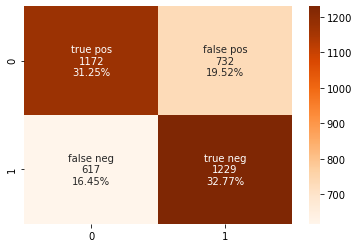

In [85]:
# confusion matrix
mat_XG2=confusion_matrix(y_test_set, y_pred_XG2)
confussion_matrix(mat_XG2)

In [86]:
# precision score, recall score, f1 score
print("precision_score_XG2:",precision_score(y_test_set, y_pred_XG2)) 
print("recall_score_XG2:",recall_score(y_test_set, y_pred_XG2))
print("f1_score_XG2:",f1_score(y_test_set, y_pred_XG2))

precision_score_XG2: 0.6267210606833248
recall_score_XG2: 0.6657638136511376
f1_score_XG2: 0.6456527449435251


In [87]:
#cross validation
cv_scores_XG2=cross_val_score(XG2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG2, "mean:", np.mean(cv_scores_XG2))

[0.63742857 0.62657143 0.62685714 0.63571429 0.62474993] mean: 0.6302642714244886


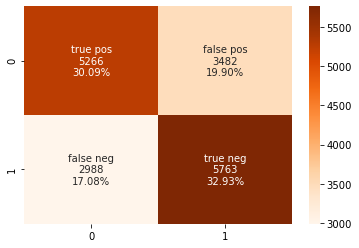

In [88]:
# confusion matrix
y_pred_xg2_c = cross_val_predict(XG2,  x_train_reduced2, y_train_set, cv=5)
cofussion_xg2=confusion_matrix(y_train_set, y_pred_xg2_c)
confussion_matrix(cofussion_xg2)

In [89]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg2_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_xg2_c))
print("f1_score:",f1_score(y_train_set, y_pred_xg2_c))

precision_score: 0.6233639805300162
recall_score: 0.6585533081933493
f1_score: 0.6404756612580573


## Random Forest2

In [90]:
forest2= RandomForestClassifier(random_state=42)
forest2.fit(x_train_reduced2, y_train_set)
y_pred_forest2=forest2.predict(x_test_reduced2)
accuracy_forest2=metrics.accuracy_score(y_test_set, y_pred_forest2)
accuracy_forest2

0.6376

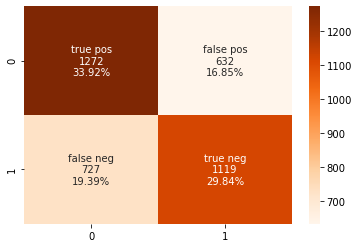

In [91]:
# confusion matrix
mat_forest2=confusion_matrix(y_test_set, y_pred_forest2)
confussion_matrix(mat_forest2)

In [92]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_forest2)) 
print("recall_score:",recall_score(y_test_set, y_pred_forest2))
print("f1_score:",f1_score(y_test_set, y_pred_forest2))

precision_score: 0.6390633923472302
recall_score: 0.6061755146262189
f1_score: 0.622185154295246


In [93]:
#cross validation
cv_scores_forest2=cross_val_score(forest2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_forest2, "mean:", np.mean(cv_scores_forest2))

[0.61542857 0.62057143 0.60285714 0.608      0.61931981] mean: 0.6132353897031806


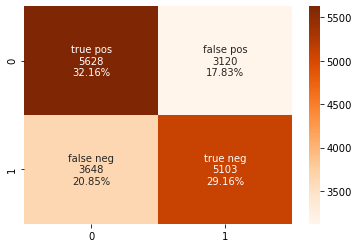

In [94]:
# confusion matrix
y_pred_forest2_c = cross_val_predict(forest2,  x_train_reduced2, y_train_set, cv=5)
cofussion_forest2=confusion_matrix(y_train_set, y_pred_forest2_c)
confussion_matrix(cofussion_forest2)

In [95]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_forest2_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_forest2_c))
print("f1_score:",f1_score(y_train_set, y_pred_forest2_c))

precision_score: 0.620576431959139
recall_score: 0.5831333561878642
f1_score: 0.6012725344644752


## Logistic Regression2

In [96]:
lr2=LogisticRegression(random_state=42)
lr2.fit(x_train_reduced2, y_train_set)
y_pred_lr2=lr2.predict(x_test_reduced2)
accuracy_lr2=metrics.accuracy_score(y_test_set, y_pred_lr2)
accuracy_lr2

0.5818666666666666

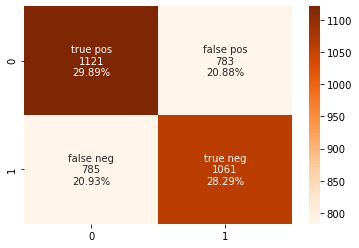

In [97]:
# confusion matrix
mat_lr2=confusion_matrix(y_test_set, y_pred_lr2)
confussion_matrix(mat_lr2)

In [98]:
print("precision_score:",precision_score(y_test_set, y_pred_lr2)) 
print("recall_score:",recall_score(y_test_set, y_pred_lr2))
print("f1_score:",f1_score(y_test_set, y_pred_lr2))

precision_score: 0.5753796095444685
recall_score: 0.5747562296858072
f1_score: 0.5750677506775069


In [99]:
#cross validation
cv_scores_lr2=cross_val_score(lr2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_lr2, "mean:", np.mean(cv_scores_lr2))

[0.56085714 0.55285714 0.56542857 0.58142857 0.56816233] mean: 0.5657467521332625


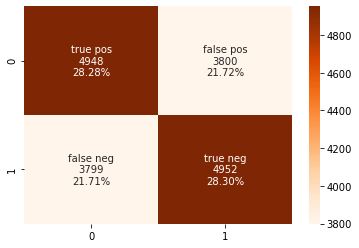

In [100]:
# confusion matrix
y_pred_lr2_c = cross_val_predict(lr2,  x_train_reduced2, y_train_set, cv=5)
cofussion_lr2=confusion_matrix(y_train_set, y_pred_lr2_c)
confussion_matrix(cofussion_lr2)

In [101]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_lr2_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_lr2_c))
print("f1_score:",f1_score(y_train_set, y_pred_lr2_c))

precision_score: 0.5658135283363802
recall_score: 0.5658781853502457
f1_score: 0.5658458549962864


## Vote2

In [197]:
vote2=VotingClassifier(estimators=[('knn', knn2),('forest', forest2),('xg',XG2),('lr',lr2)], voting='soft',weights=[0.30,0.40,0.30,0.25])
vote2.fit(x_train_reduced2, y_train_set)
y_pred_vote2=vote2.predict(x_test_reduced2)
accuracy_vote2=metrics.accuracy_score(y_test_set, y_pred_vote2)
accuracy_vote2

0.6496

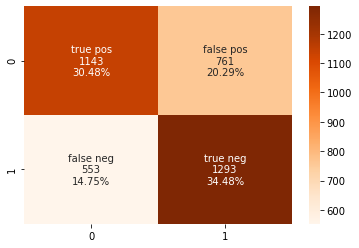

In [198]:
# confusion matrix
mat_vote2=confusion_matrix(y_test_set, y_pred_vote2)
confussion_matrix(mat_vote2)

In [199]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_vote2)) 
print("recall_score:",recall_score(y_test_set, y_pred_vote2))
print("f1_score:",f1_score(y_test_set, y_pred_vote2))

precision_score: 0.6295034079844206
recall_score: 0.7004333694474539
f1_score: 0.6630769230769231


In [200]:
#cross validation
cv_scores_vote2=cross_val_score(vote2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_vote2, "mean:", np.mean(cv_scores_vote2))

[0.642      0.62628571 0.64257143 0.64       0.63018005] mean: 0.6362074388600825


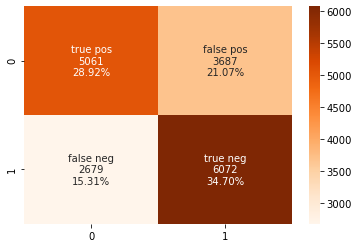

In [201]:
# confusion matrix
y_pred_vote2_c = cross_val_predict(vote2,  x_train_reduced2, y_train_set, cv=5)
cofussion_vote2=confusion_matrix(y_train_set, y_pred_vote2_c)
confussion_matrix(cofussion_vote2)

In [202]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_vote2_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_vote2_c))
print("f1_score:",f1_score(y_train_set, y_pred_vote2_c))

precision_score: 0.6221948970181371
recall_score: 0.6938635584504628
f1_score: 0.6560777957860616


In [255]:
### The best model with PCA 0.8 when checking with cross validation is the Vvoting Classifier with 63.62% success.

## PCA 0.7

In [108]:
pca3=PCA(n_components=0.7)
x_train_reduced3=pca3.fit_transform(x_train_set)
x_test_reduced3=pca3.transform(x_test_set)

In [109]:
pca3.n_components_

25

## KNN3

In [110]:
arr=np.arange(5,60,5)
arr

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

In [111]:
for x in arr:
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced3, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced3)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    print (x,accuracy_knn_x )

5 0.5954666666666667
10 0.6197333333333334
15 0.6173333333333333
20 0.6298666666666667
25 0.6178666666666667
30 0.6264
35 0.6229333333333333
40 0.6232
45 0.6176
50 0.6264
55 0.6189333333333333


In [112]:
for x in range(10,30):
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced3, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced3)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    print (x,accuracy_knn_x )  

10 0.6197333333333334
11 0.6106666666666667
12 0.6234666666666666
13 0.6130666666666666
14 0.6237333333333334
15 0.6173333333333333
16 0.6253333333333333
17 0.6242666666666666
18 0.6314666666666666
19 0.6232
20 0.6298666666666667
21 0.6189333333333333
22 0.6245333333333334
23 0.6178666666666667
24 0.6208
25 0.6178666666666667
26 0.6245333333333334
27 0.6186666666666667
28 0.6232
29 0.6170666666666667


In [113]:
knn3 = KNeighborsClassifier(n_neighbors=16)
knn3.fit(x_train_reduced3, y_train_set)
y_pred_knn3=knn3.predict(x_test_reduced3)
accuracy_knn3=metrics.accuracy_score(y_test_set, y_pred_knn3)
accuracy_knn3

0.6253333333333333

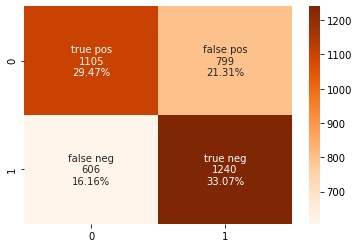

In [114]:
# confusion matrix
mat_knn3=confusion_matrix(y_test_set, y_pred_knn3)
confussion_matrix(mat_knn3)

In [115]:
print("precision_score_knn3:",precision_score(y_test_set, y_pred_knn3)) 
print("recall_score_knn3:",recall_score(y_test_set, y_pred_knn3))
print("f1_score_knn3:",f1_score(y_test_set, y_pred_knn3))

precision_score_knn3: 0.6081412457086808
recall_score_knn3: 0.6717226435536294
f1_score_knn3: 0.6383526383526383


In [116]:
#cross validation
cv_scores_knn3=cross_val_score(knn3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn3, "mean:", np.mean(cv_scores_knn3))

[0.602      0.60228571 0.61371429 0.616      0.59502715] mean: 0.6058054301228923


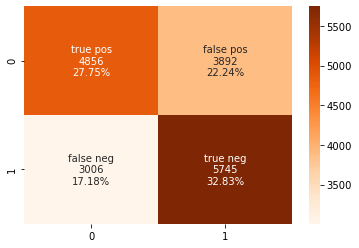

In [117]:
# confusion matrix
y_pred_knn3_c = cross_val_predict(knn3,  x_train_reduced3, y_train_set, cv=5)
cofussion_knn3=confusion_matrix(y_train_set, y_pred_knn3_c)
confussion_matrix(cofussion_knn3)

In [118]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn3_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_knn3_c))
print("f1_score:",f1_score(y_train_set, y_pred_knn3_c))

precision_score: 0.5961398775552558
recall_score: 0.6564964004113816
f1_score: 0.6248640417663693


## XG3

In [230]:
for x in arr2:
    XG3=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG3.fit(x_train_reduced3, y_train_set)
    y_pred_XG3=XG3.predict(x_test_reduced3)
    accuracy_XG3=metrics.accuracy_score(y_test_set, y_pred_XG3)
    if (accuracy_XG3>0.63):
        print (x,accuracy_XG3 )
    else:
        print(x)

25
50
75 0.6322666666666666
100
125
150
175
200
225
250
275
300
325 0.6301333333333333
350
375
400
425
450 0.6301333333333333
475 0.6317333333333334
500


In [234]:
XG3=XGBClassifier(n_estimators=75, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG3.fit(x_train_reduced3, y_train_set)
y_pred_XG3=XG3.predict(x_test_reduced3)
accuracy_XG3=metrics.accuracy_score(y_test_set, y_pred_XG3)
accuracy_XG3

0.6322666666666666

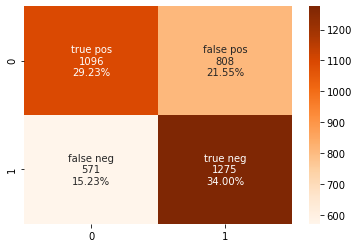

In [235]:
# confusion matrix
mat_XG3=confusion_matrix(y_test_set, y_pred_XG3)
confussion_matrix(mat_XG3)

In [236]:
# precision score, recall score, f1 score
print("precision_score_XG3:",precision_score(y_test_set, y_pred_XG3)) 
print("recall_score_XG3:",recall_score(y_test_set, y_pred_XG3))
print("f1_score_XG3:",f1_score(y_test_set, y_pred_XG3))

precision_score_XG3: 0.6120979356697072
recall_score_XG3: 0.69068255687974
f1_score_XG3: 0.6490201068974294


In [122]:
#cross validation
cv_scores_XG3=cross_val_score(XG3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG3, "mean:", np.mean(cv_scores_XG3))

[0.62542857 0.62142857 0.61485714 0.63657143 0.62246356] mean: 0.6241498550606296


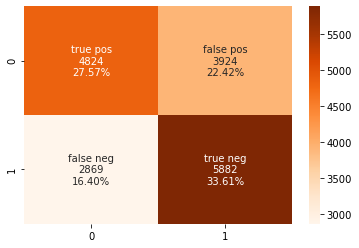

In [237]:
# confusion matrix
y_pred_xg3_c = cross_val_predict(XG3,  x_train_reduced3, y_train_set, cv=5)
cofussion_xg3=confusion_matrix(y_train_set, y_pred_xg3_c)
confussion_matrix(cofussion_xg3)

In [238]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg3_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_xg3_c))
print("f1_score:",f1_score(y_train_set, y_pred_xg3_c))

precision_score: 0.5998368345910667
recall_score: 0.6721517540852474
f1_score: 0.6339386754324513


## Random Forest3

In [123]:
forest3= RandomForestClassifier(random_state=42)
forest3.fit(x_train_reduced3, y_train_set)
y_pred_forest3=forest3.predict(x_test_reduced3)
accuracy_forest3=metrics.accuracy_score(y_test_set, y_pred_forest3)
accuracy_forest3

0.6397333333333334

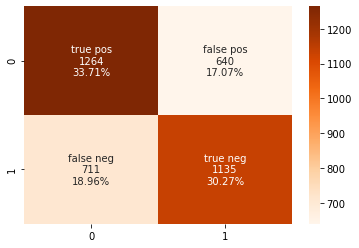

In [124]:
# confusion matrix
mat_forest3=confusion_matrix(y_test_set, y_pred_forest3)
confussion_matrix(mat_forest3)

In [125]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_forest3)) 
print("recall_score:",recall_score(y_test_set, y_pred_forest3))
print("f1_score:",f1_score(y_test_set, y_pred_forest3))

precision_score: 0.6394366197183099
recall_score: 0.6148429035752979
f1_score: 0.6268986467826566


In [126]:
#cross validation
cv_scores_forest3=cross_val_score(forest3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_forest3, "mean:", np.mean(cv_scores_forest3))

[0.62314286 0.62314286 0.61685714 0.61742857 0.62789368] mean: 0.6216930224962234


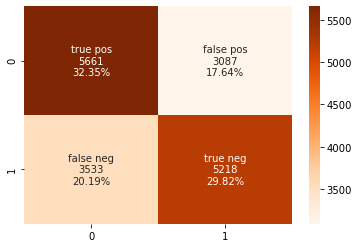

In [144]:
# confusion matrix
y_pred_forest3_c = cross_val_predict(forest3,  x_train_reduced3, y_train_set, cv=5)
cofussion_forest3=confusion_matrix(y_train_set, y_pred_forest3_c)
confussion_matrix(cofussion_forest3)

In [145]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_forest3_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_forest3_c))
print("f1_score:",f1_score(y_train_set, y_pred_forest3_c))

precision_score: 0.6282962071041541
recall_score: 0.5962747114615472
f1_score: 0.6118667917448405


## Logistic Regression3

In [146]:
lr3=LogisticRegression(random_state=42)
lr3.fit(x_train_reduced3, y_train_set)
y_pred_lr3=lr3.predict(x_test_reduced3)
accuracy_lr3=metrics.accuracy_score(y_test_set, y_pred_lr3)
accuracy_lr3

0.5768

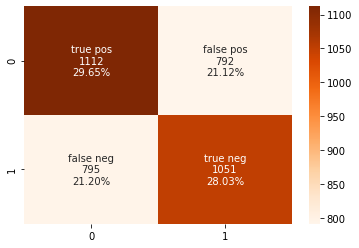

In [147]:
# confusion matrix
mat_lr3=confusion_matrix(y_test_set, y_pred_lr3)
confussion_matrix(mat_lr3)

In [148]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_lr3)) 
print("recall_score:",recall_score(y_test_set, y_pred_lr3))
print("f1_score:",f1_score(y_test_set, y_pred_lr3))

precision_score: 0.5702658708627238
recall_score: 0.5693391115926327
f1_score: 0.5698021143941449


In [149]:
#cross validation
cv_scores_lr3=cross_val_score(lr3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_lr3, "mean:", np.mean(cv_scores_lr3))

[0.56085714 0.55685714 0.56428571 0.57657143 0.58102315] mean: 0.5679189156085412


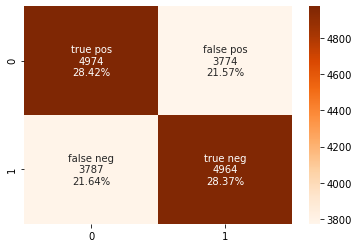

In [150]:
# confusion matrix
y_pred_lr1_3 = cross_val_predict(lr3,  x_train_reduced3, y_train_set, cv=5)
cofussion_lr3=confusion_matrix(y_train_set, y_pred_lr1_3)
confussion_matrix(cofussion_lr3)

In [151]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_lr1_3)) 
print("recall_score:",recall_score(y_train_set, y_pred_lr1_3))
print("f1_score:",f1_score(y_train_set, y_pred_lr1_3))

precision_score: 0.5680933852140078
recall_score: 0.5672494572048908
f1_score: 0.5676711075533192


## Vote3

In [152]:
vote3=VotingClassifier(estimators=[('knn', knn3),('forest', forest3),('xg',XG3),('lr',lr3)], voting='soft',weights=[0.3,0.4,0.3,0.2])
vote3.fit(x_train_reduced3, y_train_set)
y_pred_vote3=vote3.predict(x_test_reduced3)
accuracy_vote3=metrics.accuracy_score(y_test_set, y_pred_vote3)
accuracy_vote3

0.6416

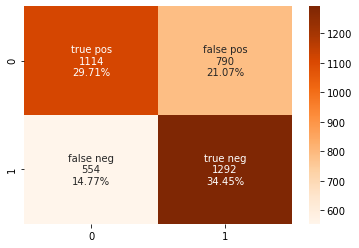

In [153]:
# confusion matrix
mat_vote3=confusion_matrix(y_test_set, y_pred_vote3)
confussion_matrix(mat_vote3)

In [154]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_vote3)) 
print("recall_score:",recall_score(y_test_set, y_pred_vote3))
print("f1_score:",f1_score(y_test_set, y_pred_vote3))

precision_score: 0.6205571565802114
recall_score: 0.6998916576381365
f1_score: 0.6578411405295317


In [155]:
#cross validation
cv_scores_vote3=cross_val_score(vote3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_vote3, "mean:", np.mean(cv_scores_vote3))

[0.62714286 0.62914286 0.634      0.63257143 0.62589311] mean: 0.6297500510349895


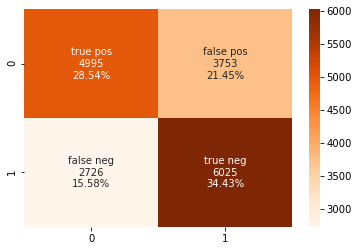

In [156]:
# confusion matrix
y_pred_vote3_c = cross_val_predict(vote3,  x_train_reduced3, y_train_set, cv=5)
cofussion_vote3=confusion_matrix(y_train_set, y_pred_vote3_c)
confussion_matrix(cofussion_vote3)

In [157]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_vote3_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_vote3_c))
print("f1_score:",f1_score(y_train_set, y_pred_vote3_c))

precision_score: 0.6161791777459603
recall_score: 0.6884927436864359
f1_score: 0.6503319121377301


In [261]:
### The best model with PCA 0.7 when checking with cross validation is the Voting Classifier with 64.16% success.

# Testing data

# PCA 0.9

In [159]:
x_test_set_dont_touch_reduced1=pca1.transform(x_test_set_dont_touch)

## KNN1

In [263]:
y_pred_knn1_test=knn1.predict(x_test_set_dont_touch_reduced1)
accuracy_knn1_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_knn1_test)
accuracy_knn1_test

0.6392

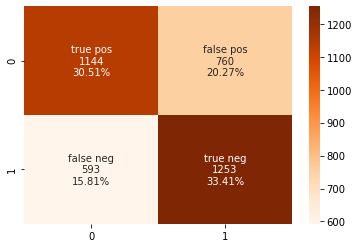

In [264]:
# confusion matrix
mat_knn1_test=confusion_matrix(y_test_set_dont_touch, y_pred_knn1_test)
confussion_matrix(mat_knn1_test)

In [265]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_knn1_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_knn1_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_knn1_test))

precision_score: 0.6224540486835569
recall_score: 0.6787648970747562
f1_score: 0.6493910339466183


## XG1

In [266]:
y_pred_XG1_test=XG1.predict(x_test_set_dont_touch_reduced1)
accuracy_XG1_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_XG1_test)
accuracy_XG1_test

0.6536

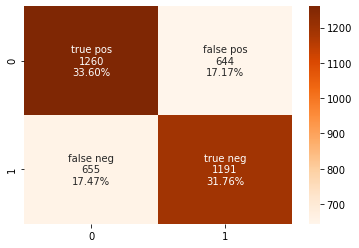

In [267]:
# confusion matrix
mat_XG1_test=confusion_matrix(y_test_set_dont_touch, y_pred_XG1_test)
confussion_matrix(mat_XG1_test)

In [268]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_XG1_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_XG1_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_XG1_test))

precision_score: 0.6490463215258856
recall_score: 0.6451787648970747
f1_score: 0.6471067644661777


## Random Forest1

In [269]:
y_pred_forest1_test=forest1.predict(x_test_set_dont_touch_reduced1)
accuracy_forest1_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_forest1_test)
accuracy_forest1_test

0.6096

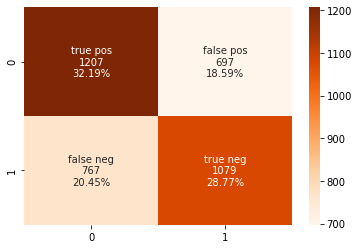

In [270]:
# confusion matrix
mat_forest1_test=confusion_matrix(y_test_set_dont_touch, y_pred_forest1_test)
confussion_matrix(mat_forest1_test)

In [271]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_forest1_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_forest1_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_forest1_test))

precision_score: 0.607545045045045
recall_score: 0.5845070422535211
f1_score: 0.5958034235229156


## Logistic Regression1

In [272]:
y_pred_lr1_test=lr1.predict(x_test_set_dont_touch_reduced1)
accuracy_lr1_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_lr1_test)
accuracy_lr1_test

0.5661333333333334

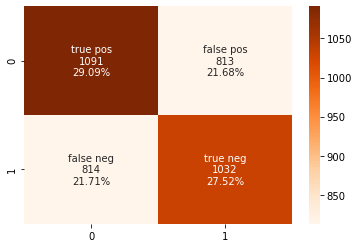

In [273]:
# confusion matrix
mat_lr1_test=confusion_matrix(y_test_set_dont_touch, y_pred_lr1_test)
confussion_matrix(mat_lr1_test)

In [274]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_lr1_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_lr1_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_lr1_test))

precision_score: 0.5593495934959349
recall_score: 0.5590465872156013
f1_score: 0.5591980493091303


## Vote1

In [275]:
y_pred_vote1_test=vote1.predict(x_test_set_dont_touch_reduced1)
accuracy_vote1_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_vote1_test)
accuracy_vote1_test

0.6594666666666666

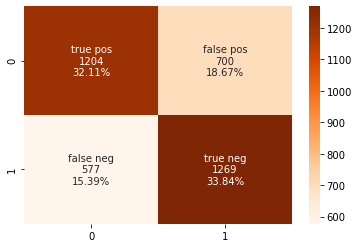

In [276]:
# confusion matrix
mat_vote1_test=confusion_matrix(y_test_set_dont_touch, y_pred_vote1_test)
confussion_matrix(mat_vote1_test)

In [277]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_vote1_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_vote1_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_vote1_test))

precision_score: 0.6444895886236668
recall_score: 0.6874322860238353
f1_score: 0.6652686762778506


In [278]:
# the best result with PCA 0.9 is the Voting classifier with 65.94% success

# PCA 0.8

In [182]:
x_test_set_dont_touch_reduced2=pca2.transform(x_test_set_dont_touch)

## KNN2

In [204]:
y_pred_knn2_test=knn2.predict(x_test_set_dont_touch_reduced2)
accuracy_knn2_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_knn2_test)
accuracy_knn2_test

0.6336

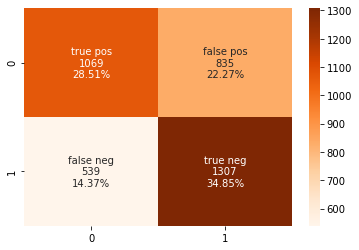

In [205]:
# confusion matrix
mat_knn2_test=confusion_matrix(y_test_set_dont_touch, y_pred_knn2_test)
confussion_matrix(mat_knn2_test)

In [206]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_knn2_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_knn2_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_knn2_test))

precision_score: 0.6101774042950514
recall_score: 0.7080173347778982
f1_score: 0.6554663991975928


## XG2

In [207]:
y_pred_XG2_test=XG2.predict(x_test_set_dont_touch_reduced2)
accuracy_XG2_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_XG2_test)
accuracy_XG2_test

0.6402666666666667

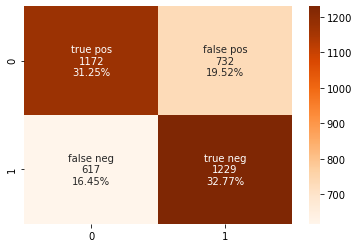

In [208]:
# confusion matrix
mat_XG2_test=confusion_matrix(y_test_set_dont_touch, y_pred_XG2_test)
confussion_matrix(mat_XG2_test)

In [209]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_XG2_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_XG2_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_XG2_test))

precision_score: 0.6267210606833248
recall_score: 0.6657638136511376
f1_score: 0.6456527449435251


## Random Forest2

In [212]:
y_pred_forest2_test=forest2.predict(x_test_set_dont_touch_reduced2)
accuracy_forest2_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_forest2_test)
accuracy_forest2_test

0.6376

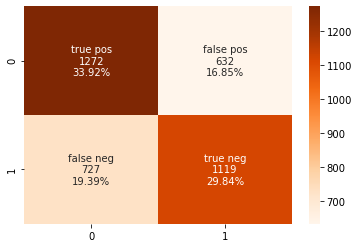

In [213]:
# confusion matrix
mat_forest2_test=confusion_matrix(y_test_set_dont_touch, y_pred_forest2_test)
confussion_matrix(mat_forest2_test)

In [214]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_forest2_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_forest2_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_forest2_test))

precision_score: 0.6390633923472302
recall_score: 0.6061755146262189
f1_score: 0.622185154295246


## Logistic Regression2

In [216]:
y_pred_lr2_test=lr2.predict(x_test_set_dont_touch_reduced2)
accuracy_lr2_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_lr2_test)
accuracy_lr2_test

0.5818666666666666

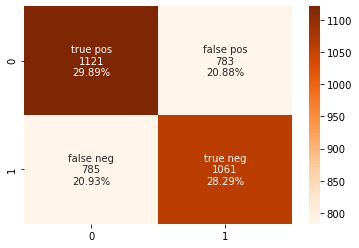

In [217]:
# confusion matrix
mat_lr2_test=confusion_matrix(y_test_set_dont_touch, y_pred_lr2_test)
confussion_matrix(mat_lr2_test)

In [218]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_lr2_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_lr2_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_lr2_test))

precision_score: 0.5753796095444685
recall_score: 0.5747562296858072
f1_score: 0.5750677506775069


## Vote2

In [219]:
y_pred_vote2_test=vote2.predict(x_test_set_dont_touch_reduced2)
accuracy_vote2_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_vote2_test)
accuracy_vote2_test

0.6496

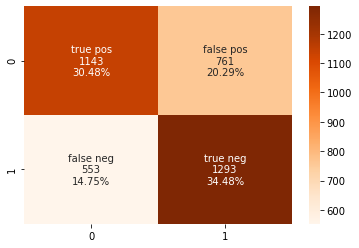

In [220]:
# confusion matrix
mat_vote2_test=confusion_matrix(y_test_set_dont_touch, y_pred_vote2_test)
confussion_matrix(mat_vote2_test)

In [221]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_vote2_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_vote2_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_vote2_test))

precision_score: 0.6295034079844206
recall_score: 0.7004333694474539
f1_score: 0.6630769230769231


In [ ]:
# the best result with PCA 0.8 is the Voting classifier with 64.96% success

# PCA 0.7

In [162]:
x_test_set_dont_touch_reduced3=pca3.transform(x_test_set_dont_touch)

## KNN3

In [223]:
y_pred_knn3_test=knn3.predict(x_test_set_dont_touch_reduced3)
accuracy_knn3_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_knn3_test)
accuracy_knn3_test

0.6253333333333333

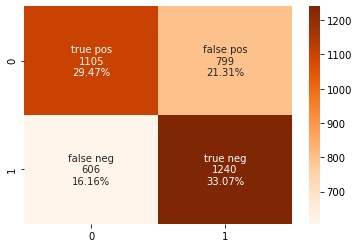

In [224]:
# confusion matrix
mat_knn3_test=confusion_matrix(y_test_set_dont_touch, y_pred_knn3_test)
confussion_matrix(mat_knn3_test)

In [225]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_knn3_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_knn3_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_knn3_test))

precision_score: 0.6081412457086808
recall_score: 0.6717226435536294
f1_score: 0.6383526383526383


## XG3

In [239]:
y_pred_XG3_test=XG3.predict(x_test_set_dont_touch_reduced3)
accuracy_XG3_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_XG3_test)
accuracy_XG3_test

0.6322666666666666

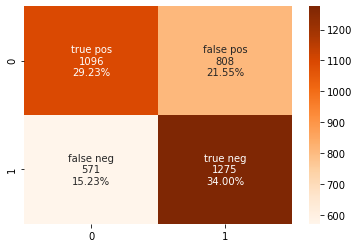

In [240]:
# confusion matrix
mat_XG3_test=confusion_matrix(y_test_set_dont_touch, y_pred_XG3_test)
confussion_matrix(mat_XG3_test)

In [241]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_XG3_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_XG3_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_XG3_test))

precision_score: 0.6120979356697072
recall_score: 0.69068255687974
f1_score: 0.6490201068974294


## Random Forest3

In [243]:
y_pred_forest3_test=forest3.predict(x_test_set_dont_touch_reduced3)
accuracy_forest3_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_forest3_test)
accuracy_forest3_test

0.6397333333333334

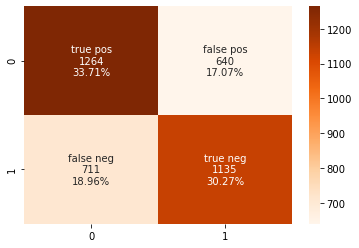

In [244]:
# confusion matrix
mat_forest3_test=confusion_matrix(y_test_set_dont_touch, y_pred_forest3_test)
confussion_matrix(mat_forest3_test)

In [245]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_forest3_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_forest3_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_forest3_test))

precision_score: 0.6394366197183099
recall_score: 0.6148429035752979
f1_score: 0.6268986467826566


## Logistic Regression3

In [247]:
y_pred_lr3_test=lr3.predict(x_test_set_dont_touch_reduced3)
accuracy_lr3_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_lr3_test)
accuracy_lr3_test

0.5768

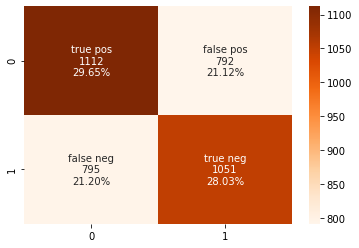

In [248]:
# confusion matrix
mat_lr3_test=confusion_matrix(y_test_set_dont_touch, y_pred_lr3_test)
confussion_matrix(mat_lr3_test)

In [249]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_lr3_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_lr3_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_lr3_test))

precision_score: 0.5702658708627238
recall_score: 0.5693391115926327
f1_score: 0.5698021143941449


## Vote3

In [251]:
y_pred_vote3_test=vote3.predict(x_test_set_dont_touch_reduced3)
accuracy_vote3_test=metrics.accuracy_score(y_test_set_dont_touch, y_pred_vote3_test)
accuracy_vote3_test

0.6416

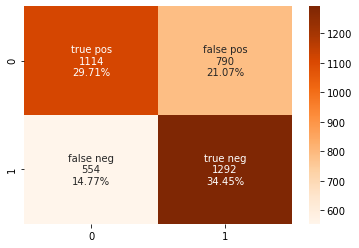

In [252]:
# confusion matrix
mat_vote3_test=confusion_matrix(y_test_set_dont_touch, y_pred_vote3_test)
confussion_matrix(mat_vote3_test)

In [253]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set_dont_touch, y_pred_vote3_test)) 
print("recall_score:",recall_score(y_test_set_dont_touch, y_pred_vote3_test))
print("f1_score:",f1_score(y_test_set_dont_touch, y_pred_vote3_test))

precision_score: 0.6205571565802114
recall_score: 0.6998916576381365
f1_score: 0.6578411405295317


In [279]:
# the best result with PCA 0.7 is the Voting classifier with 64.16% success